In [1]:
pip install pdfminer

In [ ]:
pip install docx2txt

In [1]:
import io

In [2]:
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage
#Docx resume
import docx2txt
#Wordcloud
import re
import operator
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
set(stopwords.words('english'))
from wordcloud import WordCloud
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
def read_pdf_resume(pdf_doc):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_doc, 'rb') as fh:
        for page in PDFPage.get_pages(fh, caching=True,check_extractable=True):           
            page_interpreter.process_page(page)     
        text = fake_file_handle.getvalue() 
    # close open handles      
    converter.close() 
    fake_file_handle.close() 
    if text:     
        return text

In [4]:
def clean_job_decsription(jd):
     ''' a function to create a word cloud based on the input text parameter'''
     ## Clean the Text
     # Lower
     clean_jd = jd.lower()
     # remove punctuation
     clean_jd = re.sub(r'[^\w\s]', '', clean_jd)
     # remove trailing spaces
     clean_jd = clean_jd.strip()
     # remove numbers
     clean_jd = re.sub('[0-9]+', '', clean_jd)
     # tokenize 
     clean_jd = word_tokenize(clean_jd)
     # remove stop words
     stop = stopwords.words('english')
     clean_jd = [w for w in clean_jd if not w in stop] 
     return(clean_jd)

In [5]:
def create_word_cloud(jd):
    corpus = jd
    fdist = FreqDist(corpus)
    #print(fdist.most_common(100))
    words = ' '.join(corpus)
    words = words.split()
     
     # create a empty dictionary  
    data = dict() 
    #  Get frequency for each words where word is the key and the count is the value  
    for word in (words):     
        word = word.lower()     
        data[word] = data.get(word, 0) + 1 
    # Sort the dictionary in reverse order to print first the most used terms
    dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True)) 
    word_cloud = WordCloud(width = 800, height = 800, 
    background_color ='white',max_words = 500) 
    word_cloud.generate_from_frequencies(data) 
    
    # plot the WordCloud image
    plt.figure(figsize = (10, 8), edgecolor = 'k')
    plt.imshow(word_cloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [6]:
def get_resume_score(text):
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform(text)
    #Print the similarity scores
    print("\nSimilarity Scores:")
     
    #get the match percentage
    matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
    matchPercentage = round(matchPercentage, 2) # round to two decimal
     
    print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")


Enter the Job Description: python


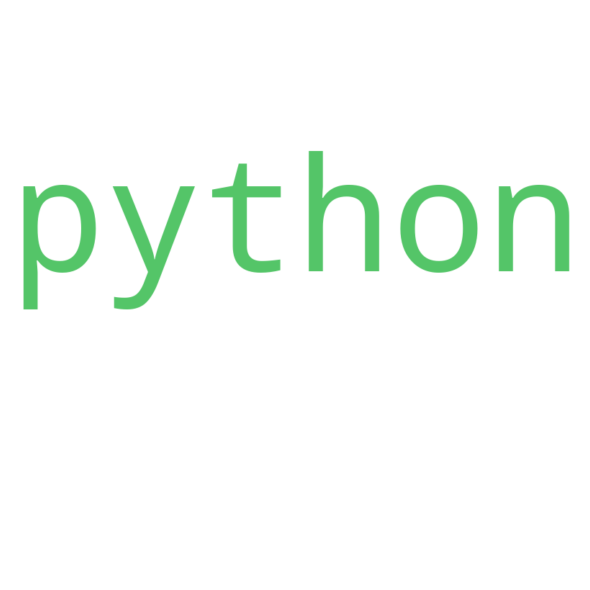


Similarity Scores:
Your resume matches about 12.15% of the job description.


In [12]:
resume = read_pdf_resume('Resume.pdf')
job_description = input("\nEnter the Job Description: ")
## Get a Keywords Cloud
clean_jd = clean_job_decsription(job_description)
create_word_cloud(clean_jd)
text = [resume, job_description]
## Get a Match
get_resume_score(text)

In [16]:
def get_resume_score(text):
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform(text)
    #Print the similarity scores
    print("\nSimilarity Scores:")
     
    #get the match percentage
    matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
    matchPercentage = round(matchPercentage, 2) # round to two decimal
     
    print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

In [18]:
#compare resume
resume1 = read_pdf_resume('Resume.pdf')
resume2 = read_pdf_resume('Resume (6).pdf')
text = [resume1, resume2]
cv = CountVectorizer(stop_words='english')
count_matrix = cv.fit_transform(text)
print("\nSimilarity Scores:")
matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage, 2) # round to two decimal   
print("Your resumes matches about "+ str(matchPercentage)+ "% from each other.")


Similarity Scores:
Your resumes matches about 54.6% from each other.
